# Predicting Smoker Status using bio-signals

<img src="https://www.rheumatologyadvisor.com/wp-content/uploads/sites/18/2019/01/cigarettesmokingts462304285_1109931.jpg" width="500">

In this project, the goal is to predict a patient's smoking status given information about various other health indicators (bio-signals). The dataset is from a "Kaggle competition," and the task is a "**binary classification**" problem. The target variable is "**smoking**" (0 = non-smoker, 1 = smoker).

## Features

* `age`: (numeric).
* `height(cm)`: (numeric).
* `weight(kg)`: (numeric).
* `waist(cm)`: (numeric).
* `eyesight(left)`: (numeric).
* `eyesight(right)`: (numeric).
* `hearing(left)`: (numeric).
* `hearing(right)`: (numeric).
* `systolic`: (numeric).
* `relaxation`: (numeric).
* `fasting blood sugar`: (numeric).
* `Cholesterol`: (numeric).
* `triglyceride`: (numeric).
* `HDL`: (numeric).
* `LDL`: (numeric).
* `hemoglobin`: (numeric).
* `Urine protein`: (numeric).
* `serum creatinine`: (numeric).
* `AST`: (numeric).
* `ALT`: (numeric).
* `Gtp`: (numeric).
* `dental caries`: (numeric).
* `smoking`: (Target) Smoking status (binary; 0 or 1).

The dataset was taken from Kaggle.

[Kaggle | Predicting Smoker Status ](https://www.kaggle.com/competitions/predicating-smoker-status-using-bio-signals/overview)

## Data Read

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis 

In [5]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,45.0,165.0,70.0,87.0,1.0,1.0,1.0,1.0,120.0,80.0,96.0,230.0,152.0,57.0,142.0,15.3,1.0,1.0,32.0,38.0,27.0,0.0,0.0
1,1,40.0,160.0,70.0,82.5,0.8,0.8,1.0,1.0,130.0,91.0,98.0,176.0,106.0,62.0,93.0,14.4,1.0,0.8,25.0,28.0,27.0,0.0,0.0
2,2,60.0,160.0,55.0,80.0,1.0,0.8,1.0,1.0,116.0,70.0,87.0,216.0,168.0,40.0,142.0,14.1,1.0,1.0,30.0,26.0,58.0,0.0,0.0
3,3,20.0,170.0,65.0,81.0,1.0,0.8,1.0,1.0,126.0,74.0,85.0,164.0,86.0,60.0,86.0,14.2,1.0,0.9,21.0,23.0,25.0,0.0,0.0
4,4,65.0,140.0,45.0,77.0,0.4,0.5,1.0,1.0,136.0,75.0,93.0,196.0,73.0,58.0,123.0,13.8,1.0,0.7,18.0,16.0,15.0,0.0,0.0


In [6]:
train.shape

(15000, 24)

In [7]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [10]:
train.drop(columns='id').describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,42.663333,10.478103,20.0,40.00,40.0,50.0,85.0
height(cm),15000.0,164.569000,8.623468,140.0,160.00,165.0,170.0,185.0
weight(kg),15000.0,64.286000,11.043475,35.0,55.00,65.0,70.0,130.0
waist(cm),15000.0,80.346420,7.877794,57.0,75.00,80.0,86.0,128.0
eyesight(left),15000.0,1.034727,0.293020,0.1,0.80,1.0,1.2,9.9
eyesight(right),15000.0,1.030653,0.317850,0.1,0.80,1.0,1.2,9.9
hearing(left),15000.0,1.005267,0.072383,1.0,1.00,1.0,1.0,2.0
hearing(right),15000.0,1.004267,0.065182,1.0,1.00,1.0,1.0,2.0
systolic,15000.0,119.356267,11.134769,85.0,110.00,119.0,128.0,170.0
relaxation,15000.0,74.972733,7.941523,0.0,70.00,75.0,80.0,110.0


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
train["smoking"].unique()

array([0., 1.])

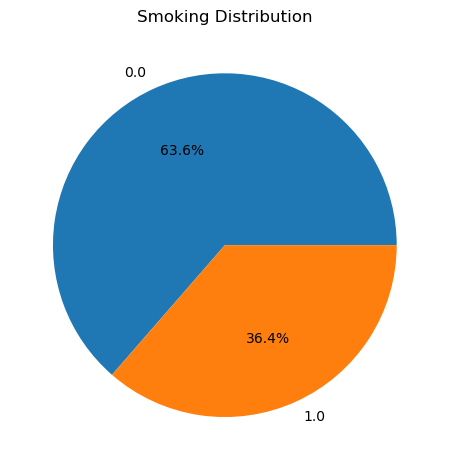

In [15]:
train.smoking.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smoking Distribution')
plt.ylabel('')
plt.tight_layout()

In [16]:
features = train.drop(columns=['id', 'smoking']).columns

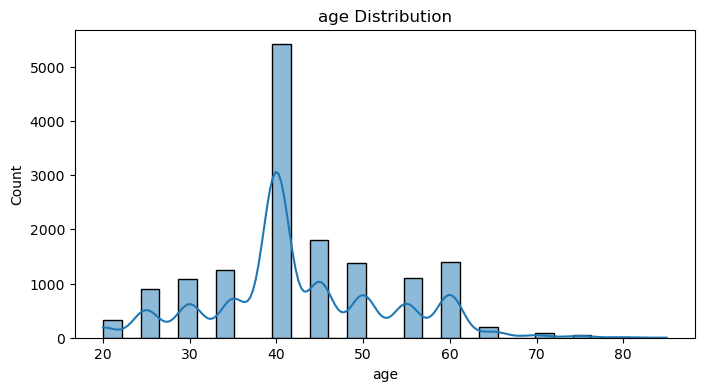

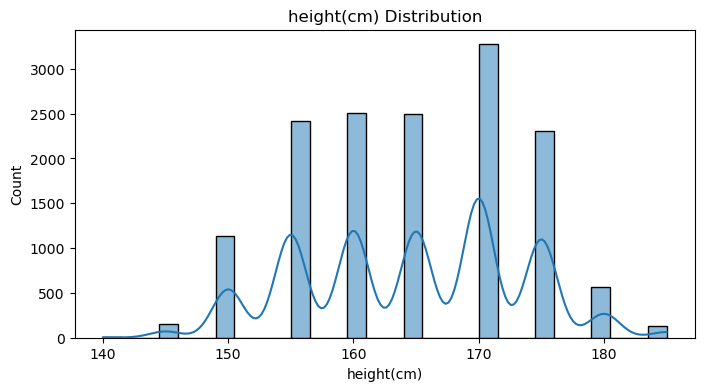

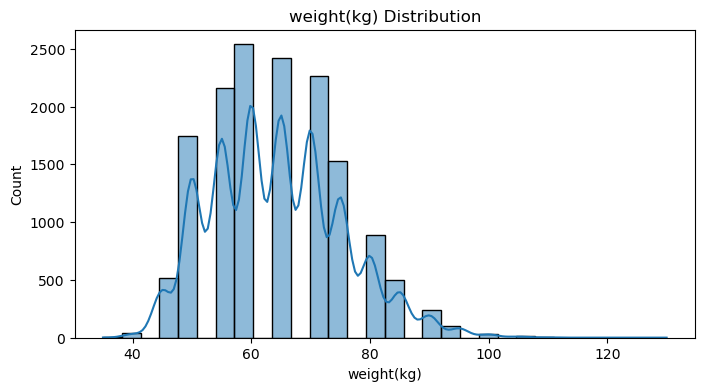

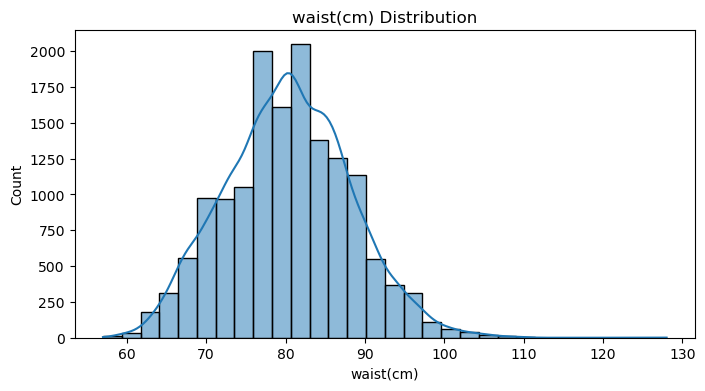

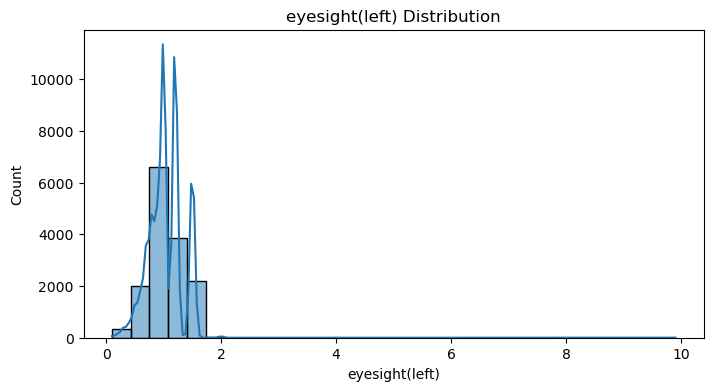

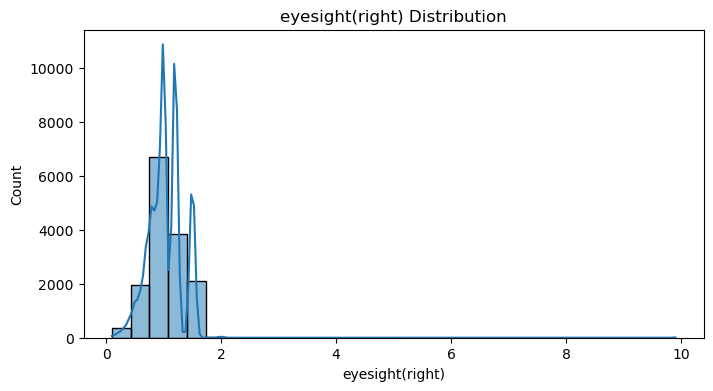

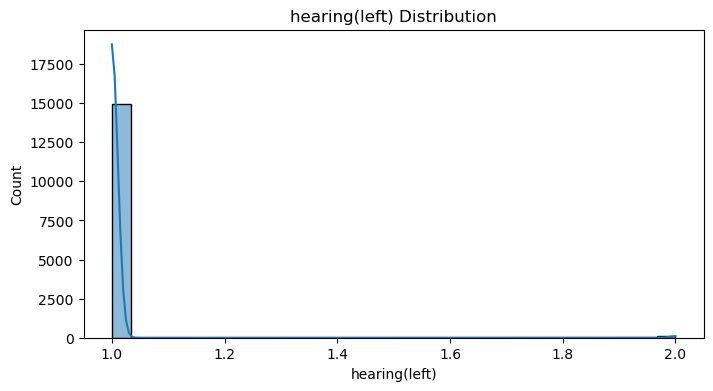

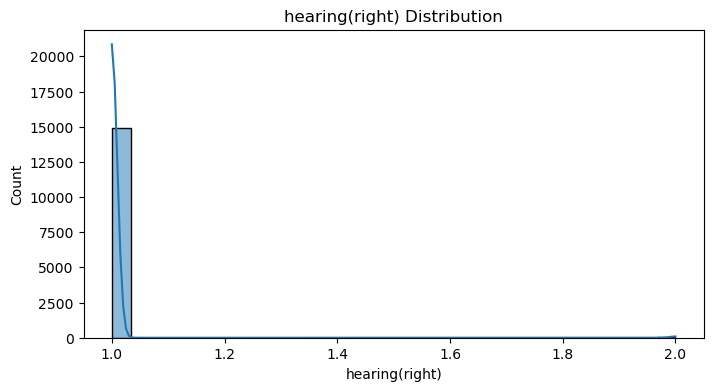

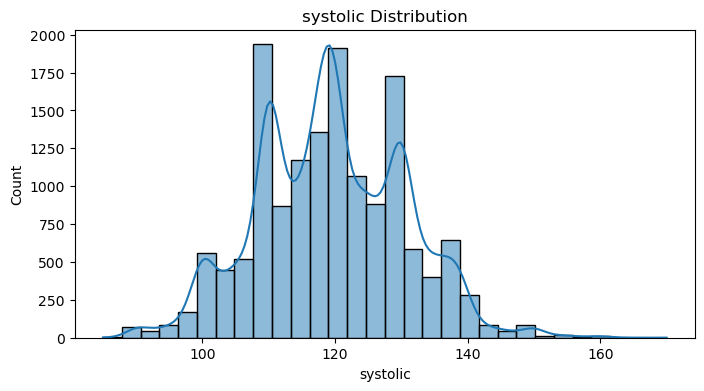

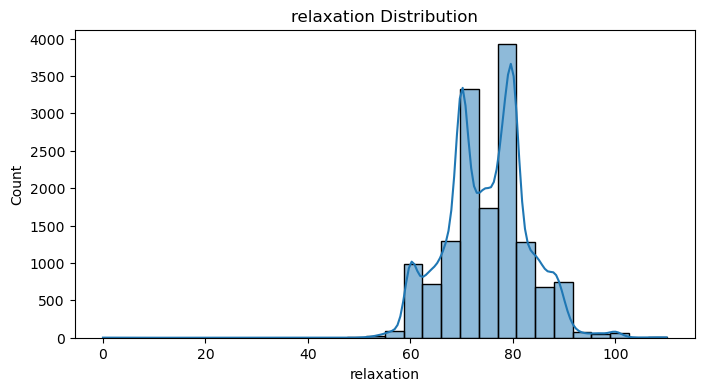

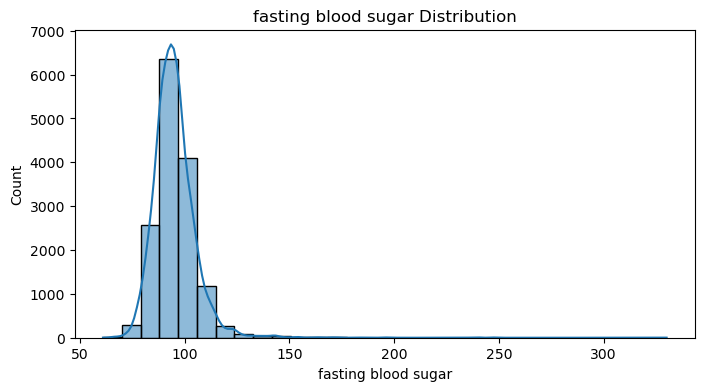

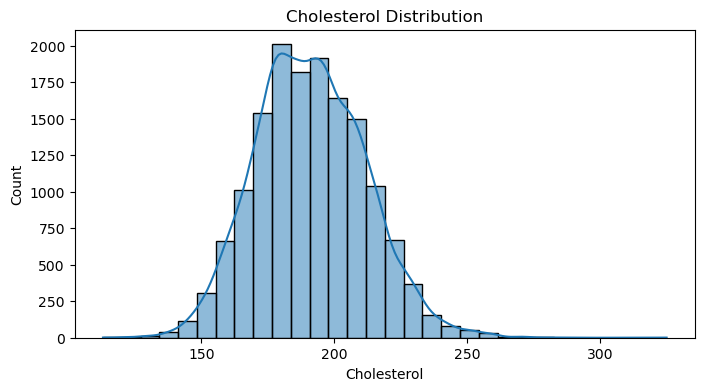

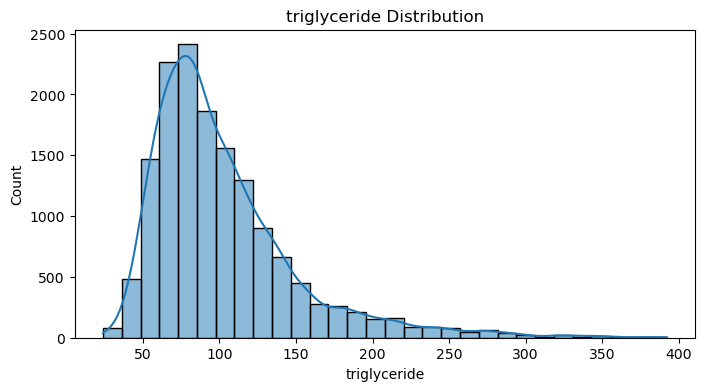

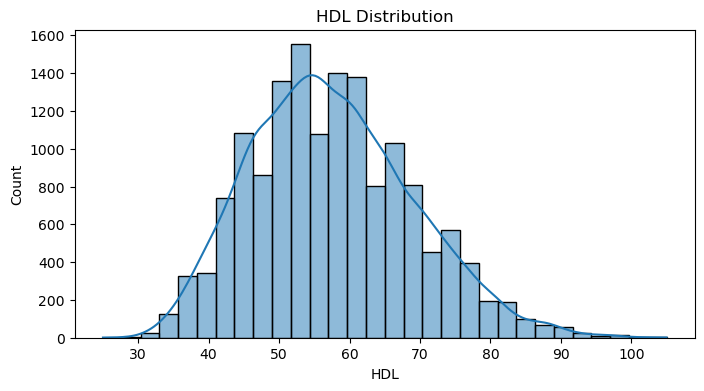

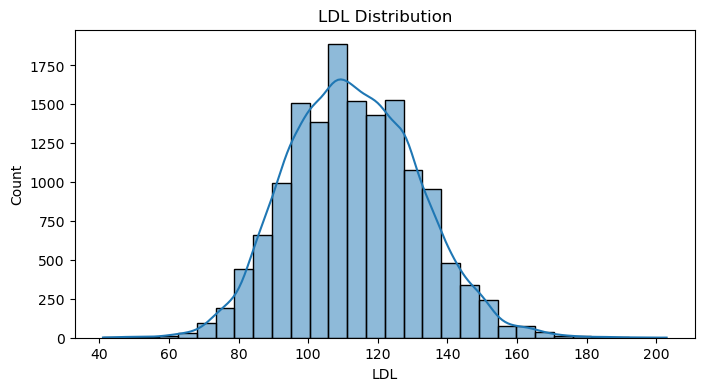

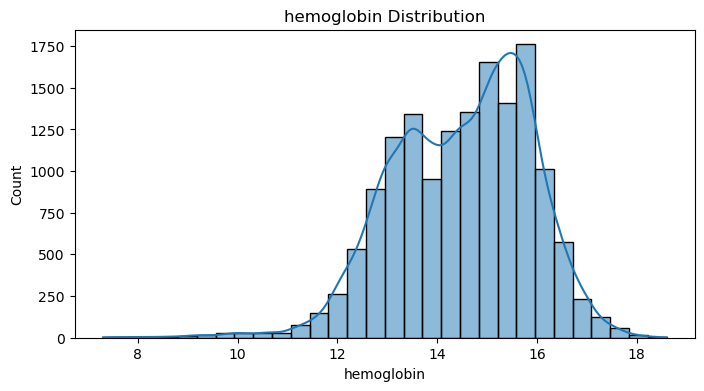

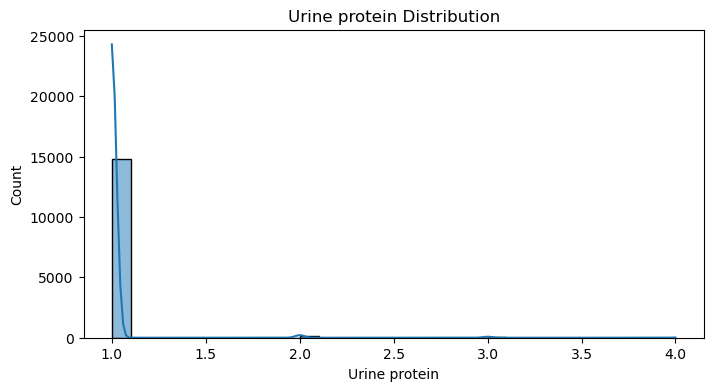

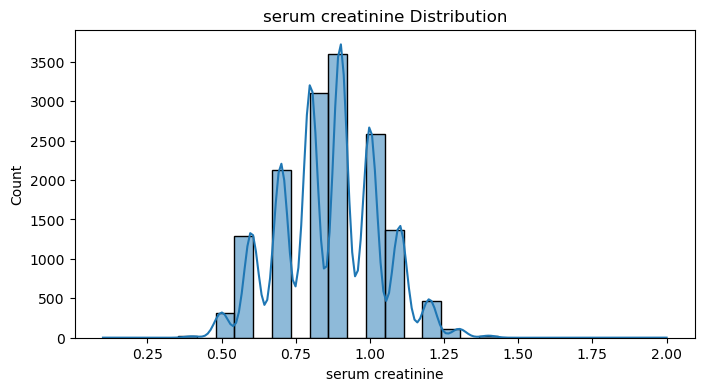

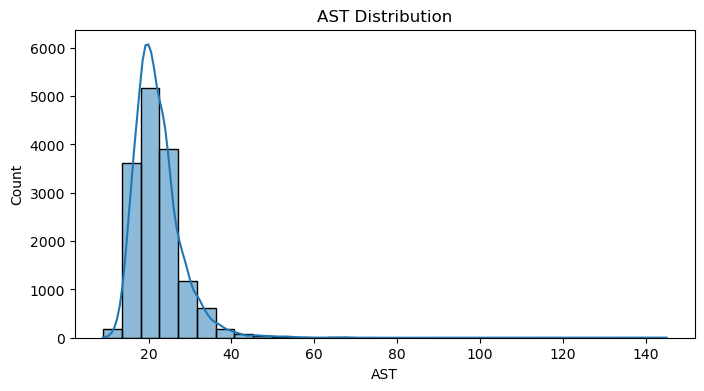

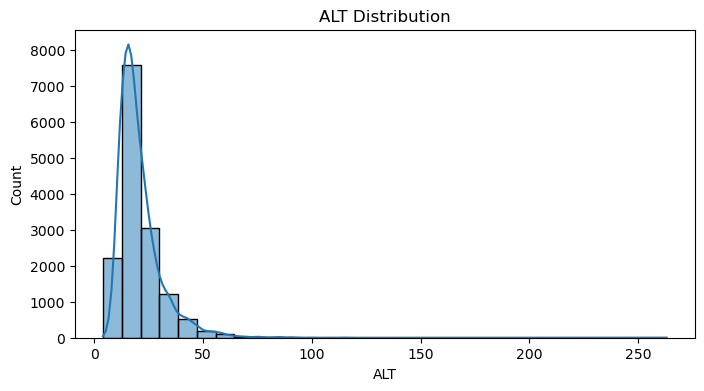

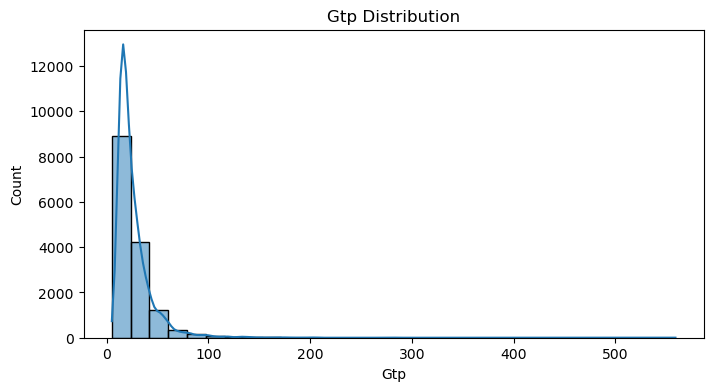

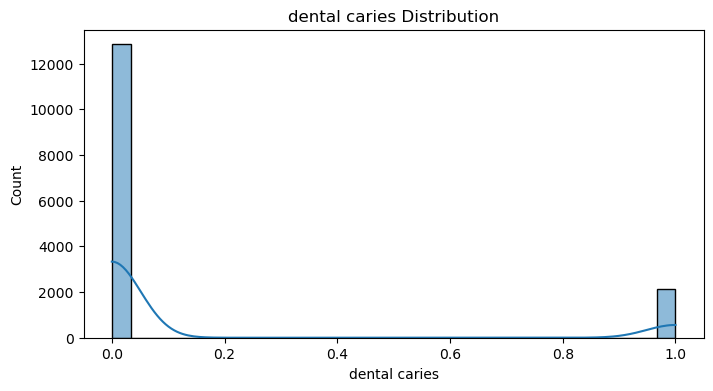

In [17]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.show()

<Axes: >

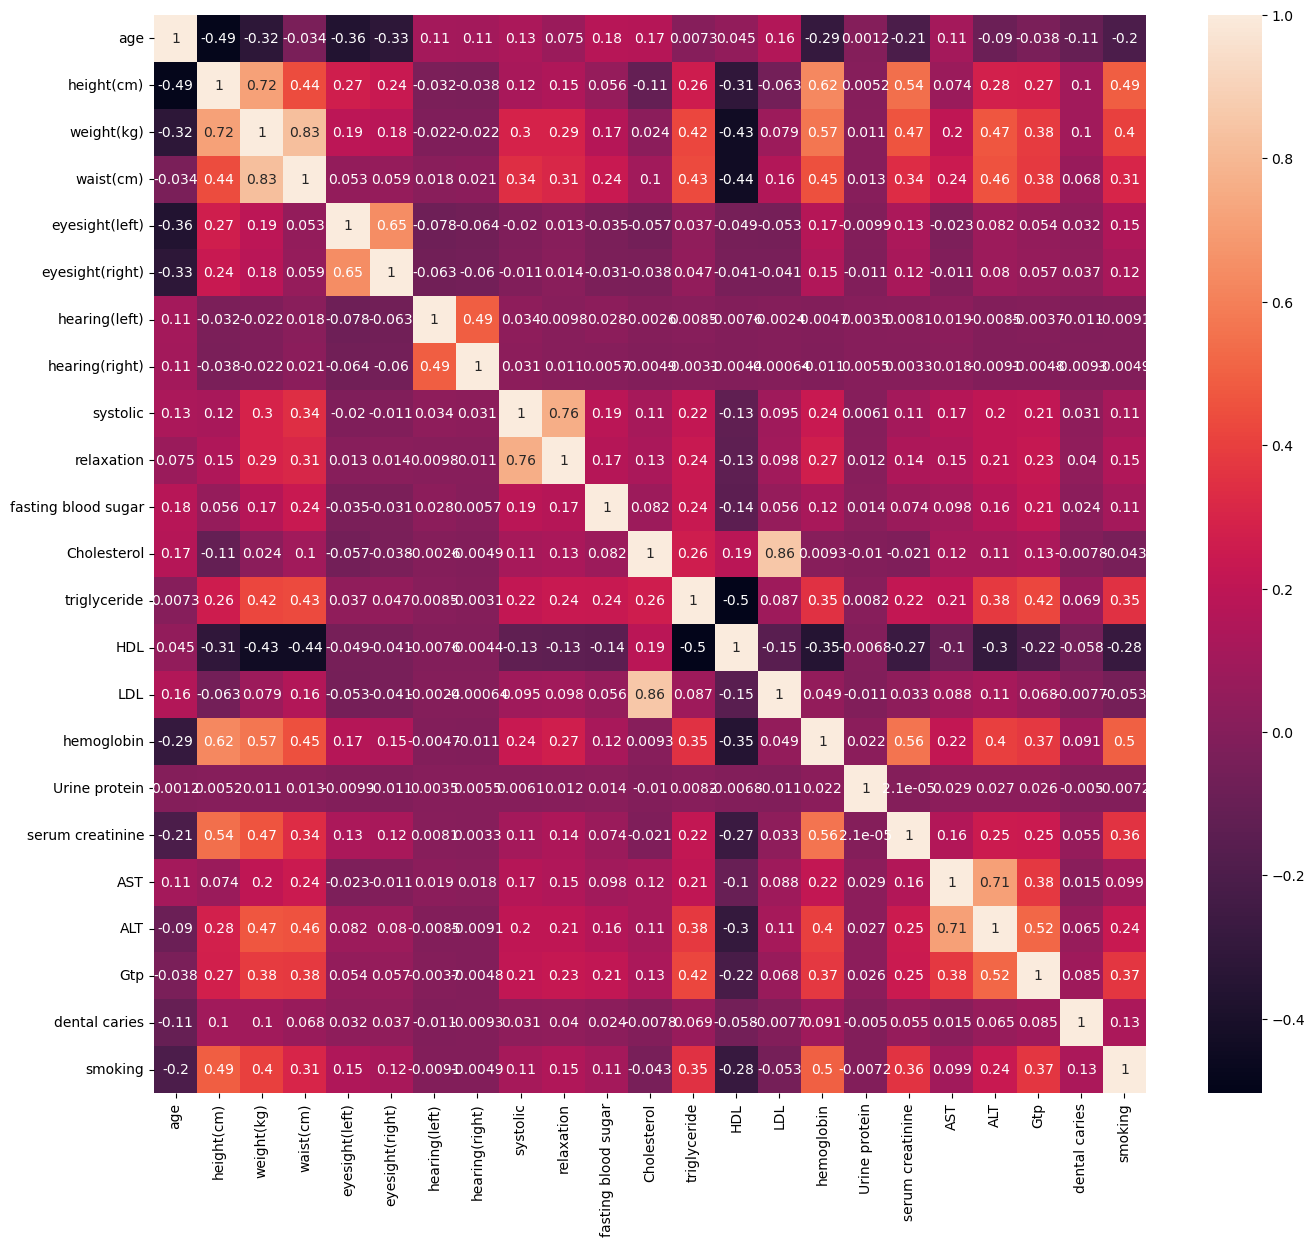

In [19]:
plt.figure(figsize=(16,14), dpi=100)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

In [21]:
abs(train.corr(numeric_only=True)['smoking'].sort_values(ascending=False))

smoking                1.000000
hemoglobin             0.499494
height(cm)             0.491010
weight(kg)             0.402612
Gtp                    0.369674
serum creatinine       0.358102
triglyceride           0.349516
waist(cm)              0.306578
ALT                    0.241052
relaxation             0.150345
eyesight(left)         0.145737
dental caries          0.131943
eyesight(right)        0.124910
systolic               0.114520
fasting blood sugar    0.109900
AST                    0.098554
id                     0.003756
hearing(right)         0.004881
Urine protein          0.007193
hearing(left)          0.009104
Cholesterol            0.042672
LDL                    0.053002
age                    0.199705
HDL                    0.282767
Name: smoking, dtype: float64

## Modelling

In [23]:
x = train.drop(columns=['smoking','id'])
y = train[['smoking']]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [25]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[1670  218]
 [ 889  223]]
LogisticRegression()  modeli eğitiliyor!..
[[1593  295]
 [ 411  701]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[1484  404]
 [ 403  709]]
RandomForestClassifier()  modeli eğitiliyor!..
[[1529  359]
 [ 285  827]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[1522  366]
 [ 262  850]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[1528  360]
 [ 384  728]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[1505  383]
 [ 267  845]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[1522  366]
 [ 262  850]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1888
         1.0       0.70      0.76      0.73      1112

    accuracy                           0.79      3000
   macro avg       0.78      0.79      0.78      3000
weighted avg       0.80      0.79      0.79      3000

Diğer

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.790667,0.790667,0.790667,0.790667
RandomForestClassifier,0.785333,0.785333,0.785333,0.785333
AdaBoostClassifier,0.783333,0.783333,0.783333,0.783333
LogisticRegression,0.764667,0.764667,0.764667,0.764667
KNeighborsClassifier,0.752000,0.752000,0.752000,0.752000
DecisionTreeClassifier,0.731000,0.731000,0.731000,0.731000
BernoulliNB,0.631000,0.631000,0.631000,0.631000


## Conclusion

In this project, various machine learning models were trained and evaluated to perform binary classification for predicting a patient's smoking status based on bio-signal data.

Based on the comparative analysis of metrics including Accuracy, Precision, Recall, and F1-score, the **`GradientBoostingClassifier`** model was identified as the most successful, achieving a top score of approximately **79.1%**.